In [3]:
import numpy as np # v 1.21.5
import sklearn # v 1.02.
import pandas as pd # v 1.5.3
import matplotlib.pyplot as plt # v 3.7.1
import statsmodels.api as sm # v.0.13.2

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

%matplotlib inline

In [14]:
# Load the dataset
ratesent = pd.read_csv("/Users/tainguyen103/Desktop/Yelp/ratings_and_sentiments.csv", encoding='latin-1')

# Summary statistics for numerical variables
ratesent.head(10)

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the vib...,5.0 star rating,5.0,HIGH,1.0,4.0,3,0.0,0.0,0.0,0.0,0,0.0,1.0,3,0,0.0,0.0,0.0
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, vibe ...",4.0 star rating,4.0,HIGH,1.0,3.0,3,0.0,0.0,0.0,0.0,0,0.0,0.0,0,2,0.0,0.0,0.0
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in food seating ...,4.0 star rating,4.0,HIGH,1.0,2.0,2,0.0,0.0,3.0,0.0,0,0.0,0.0,-1,2,0.0,0.0,0.0
3,The Factory - Cafe With a Soul,11/25/2016 Very cool vibe! Good drinks Nice s...,2.0 star rating,2.0,LOW,0.0,1.0,0,0.0,0.0,-1.0,-1.0,0,0.0,0.0,0,0,0.0,0.0,0.0
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are location within...,4.0 star rating,4.0,HIGH,1.0,2.0,0,0.0,0.0,0.0,0.0,3,0.0,0.0,0,0,0.0,0.0,0.0
5,The Factory - Cafe With a Soul,11/20/2016 1 check-in Very cute cafe! I think...,4.0 star rating,4.0,HIGH,1.0,0.0,2,0.0,0.0,0.0,-2.0,0,0.0,0.0,0,0,0.0,-1.0,0.0
6,The Factory - Cafe With a Soul,"10/27/2016 2 check-ins Listed in ""Nuptial Cof...",4.0 star rating,4.0,HIGH,1.0,3.0,0,0.0,0.0,2.0,0.0,0,0.0,0.0,1,1,1.0,0.0,0.0
7,The Factory - Cafe With a Soul,11/2/2016 2 check-ins Love this place! 5 sta...,5.0 star rating,5.0,HIGH,1.0,0.0,1,0.0,1.0,-1.0,0.0,1,1.0,0.0,-1,0,0.0,0.0,0.0
8,The Factory - Cafe With a Soul,"10/25/2016 1 check-in Ok, let's try this appr...",3.0 star rating,3.0,LOW,0.0,3.0,3,0.0,0.0,0.0,1.0,0,0.0,0.0,0,2,0.0,1.0,0.0
9,The Factory - Cafe With a Soul,11/10/2016 3 check-ins This place has been sh...,5.0 star rating,5.0,HIGH,1.0,3.0,1,0.0,0.0,0.0,0.0,0,0.0,0.0,1,0,0.0,0.0,0.0


In [5]:
ratesent.tail()

,coffee_shop_name,review_text,rating,num_rating,cat_rating,bool_HIGH,overall_sent,vibe_sent,tea_sent,service_sent,seating_sent,price_sent,parking_sent,location_sent,alcohol_sent,coffee_sent,food_sent,hours_sent,internet_sent,local_sent
7616,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7617,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
ratesent.describe()

,num_rating,bool_HIGH,overall_sent,tea_sent,service_sent,seating_sent,price_sent,location_sent,alcohol_sent,hours_sent,internet_sent,local_sent
count,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7616.000000,7615.000000,7616.000000,7616.000000
mean,4.169118,0.806197,1.107537,0.047006,0.325105,0.124869,0.015362,0.074711,0.042936,0.031779,0.025210,0.035583
std,1.065311,0.395302,1.177984,0.330775,0.827549,0.521658,0.381999,0.395392,0.298598,0.274642,0.277679,0.271992
min,1.000000,0.000000,-4.000000,-3.000000,-4.000000,-3.000000,-3.000000,-4.000000,-3.000000,-3.000000,-3.000000,-1.000000
25%,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000


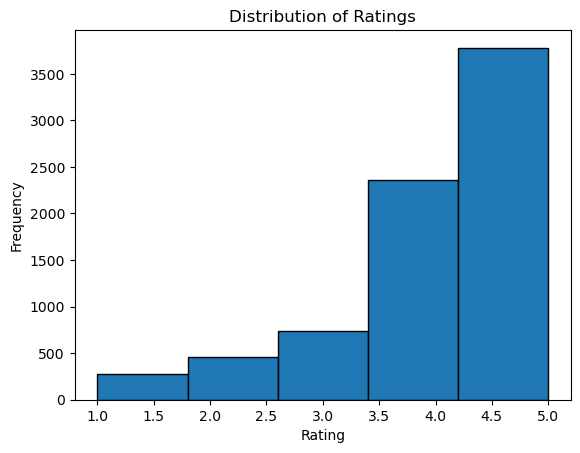

In [7]:
import matplotlib.pyplot as plt

# Histogram for 'rating'
plt.hist(ratesent['num_rating'], bins=5, edgecolor='black')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings')
plt.show()

In [17]:
# Count the number of HIGH and LOW ratings in the 'cat_rating' variable
rating_counts = ratesent['cat_rating'].value_counts()

print("HIGH Ratings:", rating_counts['HIGH'])
print("LOW Ratings:", rating_counts['LOW'])

HIGH Ratings: 6140
LOW Ratings: 1476


In [18]:
print(6140/(6140+1476)*100)

80.61974789915966


In [12]:
# Load the dataset
sentbyshop = pd.read_csv("/Users/tainguyen103/Desktop/Yelp/sentiments_by_shop.csv")

# Summary statistics for numerical variables
sentbyshop.head(5)

,coffee_shop_name,num_reviews,rating,coffee,tea,vibe,internet,food,alcohol,seating,service,parking,location,local,price,hours
0,Manana Coffee & Juice,33,4.848485,0.666667,0.030303,0.515152,0.0,0.212121,0.000000,0.212121,0.272727,0.000000,0.121212,-0.030303,-0.060606,0.060606
1,Brian's Brew,45,4.844444,0.888889,0.000000,0.044444,0.0,0.111111,0.000000,0.022222,0.222222,0.111111,0.022222,0.022222,0.000000,0.000000
2,Flitch Coffee,28,4.821429,0.571429,0.071429,0.464286,0.0,0.000000,0.000000,0.392857,0.285714,0.285714,0.035714,-0.035714,0.035714,0.000000
3,Third Coast Coffee Roasting Company,56,4.821429,0.750000,0.000000,0.160714,0.0,0.035714,0.035714,0.000000,0.214286,0.053571,0.035714,0.071429,0.178571,0.035714
4,Kowabunga Coffee,16,4.812500,0.062500,0.125000,0.000000,0.0,0.000000,0.000000,0.000000,0.437500,0.000000,0.187500,0.187500,0.000000,0.250000


In [13]:
sentbyshop.tail(5)

,coffee_shop_name,num_reviews,rating,coffee,tea,vibe,internet,food,alcohol,seating,service,parking,location,local,price,hours
61,Stinson's,100,3.81,0.44,0.03,0.0,0.16,0.42,0.07,0.03,0.28,0.00,0.17,0.04,0.10,0.13
62,Kick Butt Coffee Music & Booze,100,3.72,0.34,0.02,0.0,-0.02,0.20,0.02,0.06,0.31,0.04,0.04,0.06,-0.05,0.02
63,Pacha,100,3.69,0.37,-0.03,0.0,0.00,0.63,0.00,0.02,0.26,0.00,-0.01,0.14,-0.04,-0.01
64,"Strange Brew, Austin Coffee",100,3.60,0.53,0.01,0.0,-0.04,0.17,0.01,0.16,0.19,0.02,0.05,0.04,0.02,0.07
65,Once Over Coffee Bar,100,3.37,0.29,0.03,0.0,0.02,0.06,0.01,0.18,0.11,0.03,0.06,0.01,0.04,0.02


In [15]:
sentbyshop.describe()

,num_reviews,rating,coffee,tea,vibe,internet,food,alcohol,seating,service,parking,location,local,price,hours
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,102.151515,4.232640,0.554388,0.042674,0.219268,0.023863,0.296445,0.038427,0.122819,0.322492,0.047770,0.078777,0.037150,0.022831,0.031306
std,61.853734,0.327547,0.214650,0.074352,0.218360,0.038404,0.244657,0.090253,0.100245,0.132969,0.052809,0.069998,0.047407,0.058952,0.043699
min,16.000000,3.370000,0.062500,-0.040000,0.000000,-0.040000,0.000000,-0.010638,-0.033333,0.050000,-0.070000,-0.010000,-0.035714,-0.163934,-0.040000
25%,98.500000,3.977500,0.381983,0.005586,0.000000,0.000000,0.110278,0.000000,0.048214,0.245000,0.011886,0.030000,0.000000,-0.010000,0.000000
50%,100.000000,4.265000,0.560000,0.030000,0.210000,0.010000,0.202041,0.000000,0.090000,0.315000,0.040000,0.070000,0.030000,0.017500,0.022500
75%,100.000000,4.436618,0.717500,0.049795,0.400000,0.035066,0.416064,0.027500,0.195000,0.403191,0.070000,0.109286,0.050000,0.039375,0.051974
max,400.000000,4.848485,1.000000,0.510000,0.750000,0.160000,0.920000,0.470000,0.392857,0.620000,0.285714,0.420000,0.187500,0.200000,0.250000


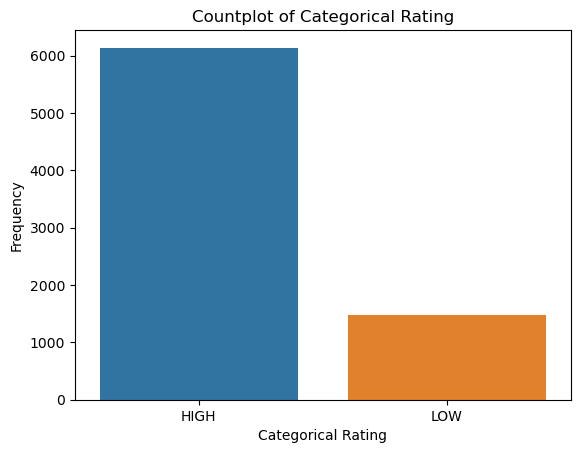

In [8]:
# Countplot for 'cat_rating'

import seaborn as sns

sns.countplot(x='cat_rating', data=ratesent)
plt.xlabel('Categorical Rating')
plt.ylabel('Frequency')
plt.title('Countplot of Categorical Rating')
plt.show()

## Topic modeling algorithms, like Latent Dirichlet Allocation (LDA) or Non-Negative Matrix Factorization (NMF), to uncover latent topics or themes within the review text, providing a deeper understanding of the key aspects discussed by customers

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Preprocess the text data (assuming 'data' is a list of review texts)
# Perform tokenization, remove stop words, etc. (not shown here)

# Delete rows with missing values in the 'review_text' column
ratesent_cleaned = ratesent.dropna(subset=['review_text'])

# Optionally, you can reset the index after dropping rows
ratesent_cleaned.reset_index(drop=True, inplace=True)

# Step 2: Vectorize the text using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
X = vectorizer.fit_transform(ratesent_cleaned['review_text'])  # 'data' is a list of review texts

# Step 3: Apply LDA
num_topics = 5  # Number of topics to uncover
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Step 4: Interpret the topics
feature_names = vectorizer.get_feature_names_out()  # Get feature names
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx + 1}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))  # Print top words for each topic
    print()

Topic 1:
coffee vibe seating place great good check service 2016 parking

Topic 2:
coffee great service place love 2016 good check vibe austin

Topic 3:
coffee service vibe like good just 2016 place time really

Topic 4:
food foods place vibe coffee good 2016 like just service

Topic 5:
food tea cream chocolate 2016 place flavors check like good



## Decision Tree

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define features (review text) and target variable (categorical rating)
X = ratesent_cleaned['review_text']
y = ratesent_cleaned['cat_rating']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create TF-IDF vectorizer to convert text data into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Build decision tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_tfidf, y_train)

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))

Decision Tree Accuracy: 0.8038057742782152
              precision    recall  f1-score   support

        HIGH       0.88      0.88      0.88      1234
         LOW       0.48      0.47      0.47       290

    accuracy                           0.80      1524
   macro avg       0.68      0.67      0.68      1524
weighted avg       0.80      0.80      0.80      1524



In [11]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a TF-IDF vectorizer to convert review text into numerical features
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(ratesent_cleaned['review_text'])

# Determine the optimal number of clusters using silhouette score
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(tfidf_matrix)
    silhouette_avg = silhouette_score(tfidf_matrix, cluster_labels)
    silhouette_scores.append(silhouette_avg)

optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
print("Optimal number of clusters:", optimal_n_clusters)

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(tfidf_matrix)

# Add cluster labels to the dataframe
ratesent_cleaned['cluster'] = cluster_labels

# Display cluster centers (optional)
print("Cluster centers:")
print(kmeans.cluster_centers_)

# Explore the clusters
for cluster_id in range(optimal_n_clusters):
    print(f"\nCluster {cluster_id}:")
    cluster_reviews = ratesent_cleaned[ratesent_cleaned['cluster'] == cluster_id]['review_text']
    print(cluster_reviews.head(5))

/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warning

Optimal number of clusters: 2
Cluster centers:
[[0.0014632  0.02492825 0.00247092 ... 0.00405719 0.00562772 0.01058816]
 [0.0017666  0.02181613 0.00225487 ... 0.00465446 0.00204255 0.00386152]]

Cluster 0:
1      12/2/2016 Listed in Date Night: Austin, vibe ...
2      11/30/2016 1 check-in Listed in food seating ...
4      12/3/2016 1 check-in They are location within...
8      10/25/2016 1 check-in Ok, let's try this appr...
10     10/22/2016 1 check-in Listed in coffee This i...
Name: review_text, dtype: object

Cluster 1:
0     11/25/2016 1 check-in Love love loved the vib...
3     11/25/2016 Very cool vibe! Good drinks Nice s...
5     11/20/2016 1 check-in Very cute cafe! I think...
6     10/27/2016 2 check-ins Listed in "Nuptial Cof...
7     11/2/2016 2 check-ins Love this place!  5 sta...
Name: review_text, dtype: object


/Users/tainguyen103/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/yv/rbjy2ldj4sz8gpjwrvqmdsym0000gn/T/ipykernel_79415/1541107982.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ratesent_cleaned['cluster'] = cluster_labels
